In [4]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import importlib
import utils
import SA_optimize
import brute_optimize
from main_cd import main_cd as main
importlib.reload(utils)
importlib.reload(SA_optimize)
importlib.reload(brute_optimize)
from utils import *


In [7]:
vars = {
        'M': [1, 10],
        'qbits_per_channel': [3,50],
        'q_swap': [0., 1.],
        } 

vals = {
        'A': main.adjacency_tree(2,3),
        'protocol':'srs', 
        'p_cons': 0.1, 
        'p_gen': 0.9, 
        'p_swap':1,  
        'return_data':'avg', 
        'progress_bar': None,
        'cutoff': 2,
        'total_time': 10,
        'N_samples' : 10,
        }

s = Surrogate(main.simulation_cd,vals,vars,20)

MAXITER = 20
for iter in range(MAXITER):
    x_new, _ , opt = s.improvement()
    s.update(x_new, opt)
    print(iter/MAXITER)
    if iter > 10 and np.mean(list(map(abs,s.mean_improvement[-10:]))) < 1e-3:
        break

0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.4
0.41
0.42
0.43
0.44
0.45
0.46
0.47
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.57
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.69
0.7
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.82
0.83
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.94
0.95
0.96
0.97
0.98
0.99


In [8]:
s_ref = Surrogate(main.simulation_cd,vals,vars,120)

Text(0.5, 0, 'Iteration')

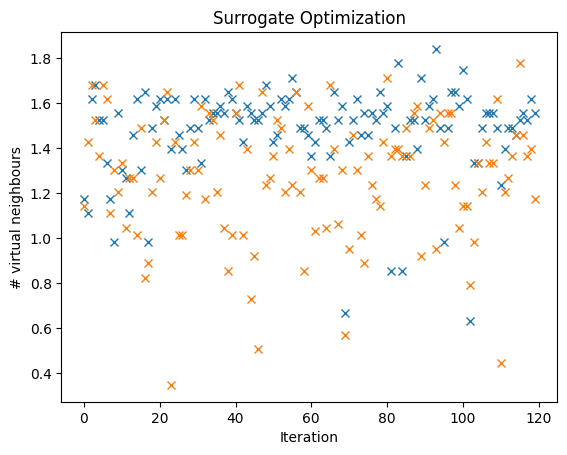

In [9]:
plt.title('Surrogate Optimization')
plt.plot([np.mean(y_i) for y_i in s.y], 'x', label='Surrogate optimization')
plt.plot([np.mean(y_i) for y_i in s_ref.y],'x', label='Random evaluations')
plt.ylabel('# virtual neighbours')
plt.xlabel('Iteration')

Text(0.5, 23.52222222222222, 'Iteration [1]')

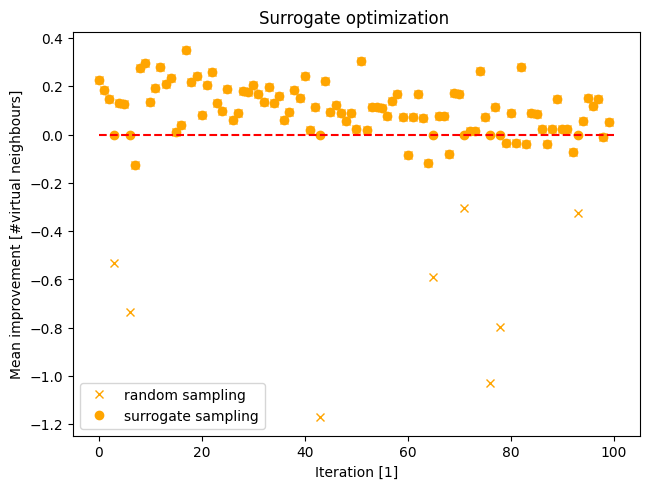

In [370]:
plt.title('Surrogate optimization ')
plt.plot(s.mean_improvement, 'x', label='random sampling', color='orange')
plt.plot(np.array(s.mean_improvement).T*np.array(s.opt_vec), 'o', label='surrogate sampling',color='orange')
plt.hlines(0,0,100,colors='red',linestyles='dashed')
plt.legend()
plt.tight_layout()
plt.ylabel('Mean improvement [#virtual neighbours]')
plt.xlabel('Iteration [1]')

CLUSTER RESULTS - 28.09.2023

In [6]:
import pickle

with open('../surdata/tree34_iter-500_objective-meanopt.pkl', 'rb') as file:
    # Load the object from the file
    loaded_data = pickle.load(file)

In [7]:
model, refmodel = loaded_data

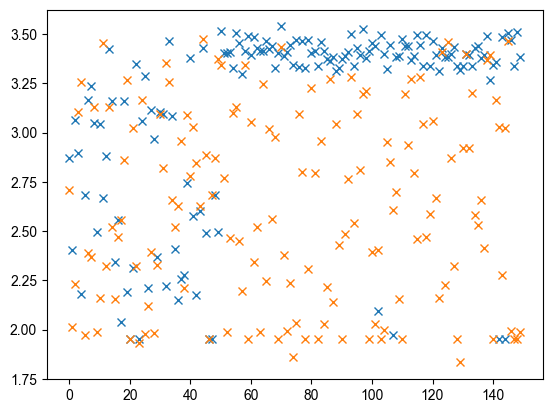

In [11]:
plt.plot([np.mean(y_i) for y_i in model.y[:150]], 'x')
plt.plot([np.mean(y_i) for y_i in refmodel.y[:150]], 'x')

In [13]:
print('optimum model', max([np.mean(y_i) for y_i in model.y[:200]]))
print('optimum reference', max([np.mean(y_i) for y_i in refmodel.y[:200]]))

optimum model 3.5388888888888888
optimum reference 3.5083333333333337


In [14]:
model.sim_time

24345.913922548294

In [17]:
model.optimize_time

66.20938435316086